#### Importing Libraries### 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

#### Fetching the dataset 

In [3]:
data = pd.read_csv('data1.csv')
data = data[data['lang'] == 'en']

In [4]:
data.head(5)

,status_id,user_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,...,retweet_count,country_code,place_full_name,place_type,followers_count,friends_count,account_lang,account_created_at,verified,lang
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,NaN,NaN,NaN,False,...,0,NaN,NaN,NaN,136,457,NaN,2009-10-08T21:06:08Z,False,en
6,1244051646935633921,27922157,2020-03-29T00:00:00Z,AmerMedicalAssn,.@PatriceHarrisMD spoke with @YahooFinance abo...,Sprinklr,NaN,NaN,NaN,False,...,3,NaN,NaN,NaN,714952,6877,NaN,2009-03-31T17:50:31Z,True,en
7,1244051645971025920,1115874631,2020-03-29T00:00:00Z,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,Twitter Media Studio,NaN,NaN,NaN,False,...,18,NaN,NaN,NaN,14040072,55,NaN,2013-01-24T03:18:59Z,True,en
9,1244051647149543426,108845320,2020-03-29T00:00:00Z,OnTopMag,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,Twitter for Advertisers,NaN,NaN,NaN,False,...,1,NaN,NaN,NaN,5042,5389,NaN,2010-01-27T05:23:15Z,False,en
14,1244051645102579712,17673635,2020-03-29T00:00:00Z,livemint,#CoronaUpdate | Johns Hopkins University has s...,TweetDeck,NaN,NaN,NaN,False,...,2,NaN,NaN,NaN,1862858,127,NaN,2008-11-27T09:07:38Z,True,en


#### Total Columns of dataset 

In [5]:
print(data.columns)
print(data.shape)

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')
(313036, 22)


In [6]:
data.drop(["status_id","user_id","created_at","source","reply_to_status_id","reply_to_user_id","reply_to_screen_name","is_quote","country_code","place_full_name","place_type","account_lang","account_created_at"],axis = 1,inplace = True)

#### Final Dataset Taken into consideration for the model 

In [7]:
data.head(10)

,screen_name,text,is_retweet,favourites_count,retweet_count,followers_count,friends_count,verified,lang
2,rlieving,“People are just storing up. They are staying ...,False,604,0,136,457,False,en
6,AmerMedicalAssn,.@PatriceHarrisMD spoke with @YahooFinance abo...,False,2894,3,714952,6877,True,en
7,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,False,65,18,14040072,55,True,en
9,OnTopMag,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,False,2658,1,5042,5389,False,en
14,livemint,#CoronaUpdate | Johns Hopkins University has s...,False,474,2,1862858,127,True,en
17,ABSCBNNews,"Singapore donates 40,000 test kits to the Phil...",False,1073,840,6767144,1075,True,en
19,RadioNLNews,It's been a remarkable week for bold policy an...,False,498,0,6929,2137,False,en
26,SputnikInt,#Pentagon activates special protocols to fight...,False,17,13,317134,288,True,en
28,RT_com,"Lockdowns, drones: Will things ever go back to...",False,943,58,3073688,640,True,en
30,AACNme,Does the #COVID19 pandemic have you feeling ou...,False,2830,4,24142,2053,False,en


In [8]:
print(data.isnull().sum())

screen_name         0
text                0
is_retweet          0
favourites_count    0
retweet_count       0
followers_count     0
friends_count       0
verified            0
lang                0
dtype: int64


#### Converting True / False to 1/0 

In [9]:
val = pd.get_dummies(data['verified'])
data = pd.concat((data,val),axis= 1)
data.drop(['verified',False],axis=1,inplace=True)
data.head(5)

,screen_name,text,is_retweet,favourites_count,retweet_count,followers_count,friends_count,lang,True
2,rlieving,“People are just storing up. They are staying ...,False,604,0,136,457,en,0
6,AmerMedicalAssn,.@PatriceHarrisMD spoke with @YahooFinance abo...,False,2894,3,714952,6877,en,1
7,CGTNOfficial,First medical team aiding #Wuhan in fight agai...,False,65,18,14040072,55,en,1
9,OnTopMag,.@KathyGriffin: @realDonaldTrump Is 'Lying' Ab...,False,2658,1,5042,5389,en,0
14,livemint,#CoronaUpdate | Johns Hopkins University has s...,False,474,2,1862858,127,en,1


#### Fucntion to remove all punctuations marks and links from the text  

In [10]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

#### Applying the function over all the text news 

In [11]:
data["text"] = data["text"].apply(wordopt)
data

,screen_name,text,is_retweet,favourites_count,retweet_count,followers_count,friends_count,lang,True
2,rlieving,people are just storing up they are staying ...,False,604,0,136,457,en,0
6,AmerMedicalAssn,patriceharrismd spoke with yahoofinance abo...,False,2894,3,714952,6877,en,1
7,CGTNOfficial,first medical team aiding wuhan in fight agai...,False,65,18,14040072,55,en,1
9,OnTopMag,kathygriffin realdonaldtrump is lying ab...,False,2658,1,5042,5389,en,0
14,livemint,coronaupdate johns hopkins university has s...,False,474,2,1862858,127,en,1
...,...,...,...,...,...,...,...,...,...
564135,RisatoNicola,trump extends coronavirus guidelines braces...,False,3575,1,160,97,en,0
564136,tmcrypto1,a nypd member dies of coronavirus after hun...,False,2526,0,85,123,en,0
564137,CALcharters,for many students in our state closures are...,False,4656,2,8104,2798,en,1
564138,npquarterly,will the coronavirus pandemic of come to be ...,False,2916,2,127869,3046,en,0


#### Distributing the train-test data 

In [12]:
x = data[["text","favourites_count","retweet_count","followers_count","friends_count"]]
y = data[True]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.70)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(93910, 5)
(219126, 5)
(93910,)
(219126,)


#### Seperating the Meta Data#### 

In [13]:
x_train_meta = x_train
x_test_meta = x_test

x_train_meta = x_train.drop(["text"],axis = 1)
x_test_meta = x_test.drop(["text"],axis = 1)

x_train_meta

,favourites_count,retweet_count,followers_count,friends_count
88217,5289,0,3470,852
458195,1488,0,158,312
247929,4404,4,5282887,229
377203,540,8,1870,207
516355,1353,0,16,34
...,...,...,...,...
518532,589,0,99,225
208525,6,0,3,50
49417,2834,0,10,92
494085,19,0,89,461


#### Pre Processing News using Bag of Words 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
Countvector = CountVectorizer(min_df=10,ngram_range=(1,2))
# xb_train = Countvector.fit_transform(x_train['text'].values)
# xb_test = Countvector.transform(x_test['text'].values)

In [16]:
# xb_train

#### Pre Processing using Tfidf Vectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorization = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
xv_train = vectorization.fit_transform(x_train['text'].values)
xv_test = vectorization.transform(x_test['text'].values)

In [20]:
print(xv_train.shape)
print(xv_test.shape)

print('\n < M E T A > \n')

print(x_train_meta.shape)
print(x_test_meta.shape)

(93910, 118382)
(219126, 118382)

 < M E T A > 

(93910, 4)
(219126, 4)


In [21]:
import scipy
dummy_xtrain_meta = scipy.sparse.csr_matrix(x_train_meta.values)
dummy_xtest_meta = scipy.sparse.csr_matrix(x_test_meta.values)

In [22]:
print(xv_train.shape)
print(xv_test.shape)

(93910, 118382)
(219126, 118382)


#### Combing the Text news with pre-processed data and Meta Data for the final dataset 

In [23]:
from scipy.sparse import hstack
final_xv_train = hstack((xv_train, dummy_xtrain_meta))
final_xv_test = hstack((xv_test, dummy_xtest_meta))
print(final_xv_train.shape)
print(final_xv_test.shape)

(93910, 118386)
(219126, 118386)


### Applying Model - Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
LR = LogisticRegression()
LR.fit(final_xv_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
pred_lr=LR.predict(final_xv_test)

In [27]:
print('Logisitic Regression Accuracy \n')
print(LR.score(final_xv_test, y_test))

Logisitic Regression Accuracy 

0.9311583289979282


In [28]:
print('Logisitc Regression Report \n')
print(classification_report(y_test, pred_lr))

Logisitc Regression Report 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    197948
           1       0.85      0.35      0.49     21178

    accuracy                           0.93    219126
   macro avg       0.89      0.67      0.73    219126
weighted avg       0.93      0.93      0.92    219126



### Applying Model - Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
DT = DecisionTreeClassifier()
DT.fit(final_xv_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
pred_dt = DT.predict(final_xv_test)

In [32]:
print('Decision Tree Accuracy \n')
print(DT.score(final_xv_test, y_test))

Decision Tree Accuracy 

0.9497686262698174


In [33]:
print('Decision Tree Report \n')
print(classification_report(y_test, pred_dt))

Decision Tree Report 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97    197948
           1       0.75      0.72      0.74     21178

    accuracy                           0.95    219126
   macro avg       0.86      0.85      0.85    219126
weighted avg       0.95      0.95      0.95    219126



In [34]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [35]:
cm = confusion_matrix(y_test,pred_dt)
cm

array([[192829,   5119],
       [  5888,  15290]], dtype=int64)

In [56]:
##### [true_positive      false_negative]
##### [false positive     true_negative] 

In [36]:
labels = (['FAKE','REAL'])

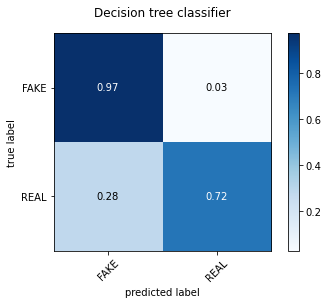

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

multiclass = np.array(confusion_matrix(y_test,pred_dt))

class_names = ['FAKE', 'REAL']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.title('Decision tree classifier')
plt.show()

In [45]:
cm1 = confusion_matrix(y_test,pred_lr)
cm1

array([[196678,   1270],
       [ 13815,   7363]], dtype=int64)

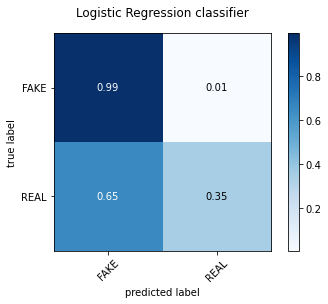

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

multiclass = np.array(confusion_matrix(y_test,pred_lr))

class_names = ['FAKE', 'REAL']

fig, ax = plot_confusion_matrix(conf_mat=multiclass,
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,
                                class_names=class_names)
plt.title('Logistic Regression classifier')
plt.show()

#### Function to predict is news True / False using the Machine learning Model

In [48]:
def test_news(text,favourites_count,retweet_count,followers_count,friends_count,vectorizer,classifier):
    testing_news = {"text":[news]}
    news_test = pd.DataFrame(testing_news)

    news_test["text"] = news_test["text"].apply(wordopt)
    # new_x_test = [new_def_test["text"],1,120,750,500] 
    # test = news_test["text"]
    
    news_test["favourites_count"] = favourites_count
    news_test["retweet_count"] = retweet_count
    news_test["followers_count"] = followers_count
    news_test["friends_count"] = friends_count
    
    #applying tfidf vectorizer
    news_text_data = vectorization.transform(news_test['text'].values)
    
    import scipy
    news_meta_data = news_test.drop(['text'],axis = 1)
    dummy_news_meta = scipy.sparse.csr_matrix(news_meta_data.values)
    final_news_data = hstack((news_text_data, dummy_news_meta))
    
    result = classifier.predict(final_news_data)
    
    if result == 0:
        res = 'FALSE'
    if result == 1:
        res = 'TRUE'
    
    return res

#### Predicting a news using Decision Tree Classifier 

In [49]:
# news = str(input())
news = "#Pentagon activates special protocols to fight #COVID19, can hide info about infected troops â€“ report https://t.co/3AXSnkta3V"
ans = test_news(news,17,13,317134,288,vectorization,DT)
print(ans)

TRUE


#### Predicting a news using Logistic Regression Classifier 

In [50]:
# news = str(input())
news = "#Pentagon activates special protocols to fight #COVID19, can hide info about infected troops â€“ report https://t.co/3AXSnkta3V"
ans = test_news(news,17,13,317134,288,vectorization,LR)
print(ans)

TRUE
